#### 1- Sort Touples With Lambda

In [53]:
def sort(touples):
    return sorted(touples, key=lambda touples : (touples[0], touples[1]))

# Test Case
t = ((3,4), (5,3), (2,10), (5,2))
print(sort(t))

[(2, 10), (3, 4), (5, 2), (5, 3)]


#### 2- Merge Sort

In [54]:
def merge_sort(data):
    n = len(data)
    if n == 1: # base case
        return data
    mid = n // 2
    l = merge_sort(data[:mid])
    r = merge_sort(data[mid:])
    return merger(l,r)

def merger(l, r):
    n, m = len(l), len(r)
    i, j = 0, 0
    res = []
    while i < n and j < m:
        if l[i] <= r[j]:
            res.append(l[i])
            i += 1
        else:
            res.append(r[j])
            j += 1
    while i < n:
        res.append(l[i])
        i += 1
    while j < m:
        res.append(r[j])
        j += 1
    return res

# Test Case:
data = [3, 5, 2, 1, 5, 6, 8]
print(merge_sort(data))


[1, 2, 3, 5, 5, 6, 8]


#### 3- Heap Sort

In [55]:
def heap_sort(data):
    n = len(data)
    for i in range(n, -1, -1):
        heapify(data, i, n)
    for i in range(n-1, 0, -1):
        data[0], data[i] = data[i], data[0]
        heapify(data, 0, i)
    return data

def heapify(data, i, n):
    lowest_idx = i
    l = 2*i + 1
    r = 2*i + 2
    if l < n and data[l] > data[lowest_idx]:
        lowest_idx = l
    if r < n and data[r] > data[lowest_idx]:
        lowest_idx = r
    if lowest_idx != i:
        data[i], data[lowest_idx] = data[lowest_idx], data[i]
        heapify(data, lowest_idx, n)


# Test Case:
data = [3, 5, 2, 1, 5, 6, 8]
print(heap_sort(data))


[1, 2, 3, 5, 5, 6, 8]


#### 4- Unique Permutation

In [56]:
from itertools import permutations
def unique_permutation(data):
    return list(set(permutations(data)))

# Test Case:
data = [1,1,0,0]
print(unique_permutation(data))

[(0, 1, 0, 1), (1, 1, 0, 0), (0, 1, 1, 0), (1, 0, 1, 0), (1, 0, 0, 1), (0, 0, 1, 1)]


#### 5- Find Subsets

In [57]:
from itertools import chain, combinations
def get_subsets(data):
    return list(chain.from_iterable(combinations(data, i) for i in range(len(data)+1)))

#Test Case
data = [1,1,0,0]
print(get_subsets(data))

[(), (1,), (1,), (0,), (0,), (1, 1), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1, 0), (1, 1, 0), (1, 0, 0), (1, 0, 0), (1, 1, 0, 0)]


#### 6- Tree Problem: Check if a tree is balanced
A tree is balanced is if the height of the left and right nodes are at most +1 different

In [58]:
class Node:
    def __init__(self, data):
        self.data = data
        self.right = None
        self.left = None

class Tree:
    def __init__(self, data):
        self.root = Node(data)        

    def get_height(self, r):
        if r is None:
            return 0
        return 1 + max(self.get_height(r.left), self.get_height(r.right))
    
    def is_balanced(self, r):
        if r is None:
            return True
        return (self.is_balanced(r.left) and 
                self.is_balanced(r.right) and
                abs(self.get_height(r.left) - self.get_height(r.right)) <= 1
            )

# Test Case:
tree = Tree(1)
tree.root.left = Node(2)
tree.root.left.right = Node(4)
tree.root.left.right.left = Node(6)
tree.root.right = Node(3)
tree.root.right.right = Node(5)
tree.root.right.right.right = Node(7)


print("Tree height is : ", tree.get_height(tree.root))

print("Tree is balanced? ", tree.is_balanced(tree.root))     

Tree height is :  4
Tree is balanced?  False


#### 7- Thief Problem
he thief has found himself a new place for his thievery. There is only one entrance to this area, called root.

Besides the root, each house has one and only one parent house. After a tour, the smart thief realized that all houses in this place form a binary tree. It will automatically contact the police if two directly-linked houses were broken into on the same night.

Given the root of the binary tree, return the maximum amount of money the thief can rob without alerting the police.

Example 1:

Input: root = [3,2,3,null,3,null,1]
Output: 7
Explanation: Maximum amount of money the thief can rob = 3 + 3 + 1 = 7.

In [59]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
class Tree:
    def __init__(self, data):
        self.root = Node(data)
    def getTheifMax(self, root):
        def dfs(root):
            if root is None:
                return [0, 0]                
            l = dfs(root.left)
            r = dfs(root.right)
            return [root.data + l[1] + r[1], max(l) + max(r)]
        return max(dfs(root))
    
# Test Case:
tree = Tree(3)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.right = Node(3)
tree.root.right.right = Node(1)   

print(tree.getTheifMax(tree.root))

7


#### 8- Graph: DFS

In [60]:
class Graph:
    def __init__(self, graph):
        n = len(graph)
        self.graph = graph
        self.visited = []
    def dfs_search(self, node):
        if node not in self.visited:
            self.visited.append(node)
            for n in graph[node]:
                self.dfs_search(n)


graph = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}           

g = Graph(graph)
g.dfs_search('A')
print(g.visited)

['A', 'B', 'S', 'C', 'D', 'E', 'H', 'G', 'F']


#### 9- Graph: BFS

In [61]:
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.visited = []
        self.q = []
    def bfs_search(self,root):
        if root not in self.visited:
            self.q.append(root)
        while len(self.q) > 0:
            popped = self.q.pop(0)
            if popped not in self.visited:
                self.visited.append(popped)
                for n in self.graph[popped]:
                    if n not in self.visited:
                        self.q.append(n)

# Test Case
graph = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}           

g = Graph(graph)
g.bfs_search('A')
print(g.visited)

['A', 'B', 'S', 'C', 'G', 'D', 'E', 'F', 'H']


#### 10- Graph: Cycle Identification
To find cycle in a directed graph we can use the Depth First Traversal (DFS) technique. It is based on the idea that there is a cycle in a graph only if there is a back edge [i.e., a node points to one of its ancestors] present in the graph.

To detect a back edge, we need to keep track of the nodes visited till now and the nodes that are in the current recursion stack [i.e., the current path that we are visiting]. If during recursion, we reach a node that is already in the recursion stack, there is a cycle present in the graph.

In [62]:
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.visited = []
        self.isCycliccal = False
    def has_cycle(self, root):
        if root not in self.visited and self.isCycliccal == False:
            self.visited.append(root)
            for n in self.graph[root]:
                if n in self.visited:
                    self.isCycliccal = True      
                    break              
                else:
                    self.has_cycle(n)
        return self.isCycliccal

        
# Test Case
graph = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}           

g = Graph(graph)
print(g.has_cycle('H'))
print(g.visited)

True
['H', 'E', 'C', 'D']


#### 11- Graph: Dijkstra
For Dijkstra’s algorithm, it is always recommended to use Heap (or priority queue).

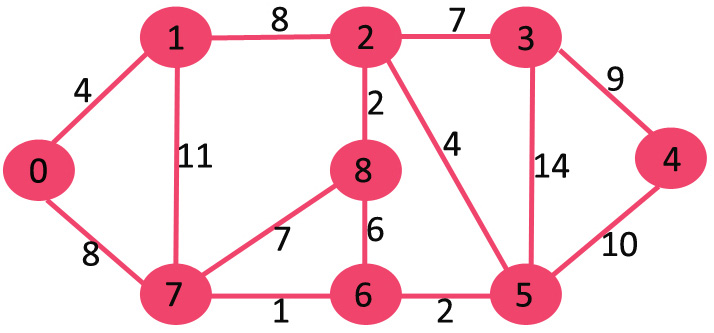

In [63]:
import heapq
iPair = tuple

class Graph:
    def __init__(self, v):
        self.v = v
        self.adj = [[] for _ in range(v)]
    
    def addEdge(self, u, v, w):
        self.adj[u].append((v, w))
        self.adj[v].append((u, w))

    def getDijkstraShortestPath(self, root):
        # Create a priority queue to store vertices that are being preprocessed
        priority_q = []
        heapq.heappush(priority_q, (0, root))
        # Create a vector for distances and initialize all distances as infinite (INF)
        dist = [float('inf')] * self.v
        dist[root] = 0

        while priority_q:
            # The first vertex in pair is the minimum distance
            # vertex label is stored in second of pair
            d, u = heapq.heappop(priority_q)

            # 'i' is used to get all adjacent vertices of a vertex
            for v, weight in self.adj[u]:
                # If there is shorted path to v through u.
                if dist[v] > dist[u] + weight:
                    # Updating distance of v
                    dist[v] = dist[u] + weight
                    heapq.heappush(priority_q, (dist[v], v))
 
        # Print shortest distances stored in dist[]
        for i in range(self.v):
            print(f"{i} \t\t {dist[i]}")

# Test Case
V = 9
g = Graph(V)

# making above shown graph
g.addEdge(0, 1, 4)
g.addEdge(0, 7, 8)
g.addEdge(1, 2, 8)
g.addEdge(1, 7, 11)
g.addEdge(2, 3, 7)
g.addEdge(2, 8, 2)
g.addEdge(2, 5, 4)
g.addEdge(3, 4, 9)
g.addEdge(3, 5, 14)
g.addEdge(4, 5, 10)
g.addEdge(5, 6, 2)
g.addEdge(6, 7, 1)
g.addEdge(6, 8, 6)
g.addEdge(7, 8, 7)

g.getDijkstraShortestPath(0)

0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14



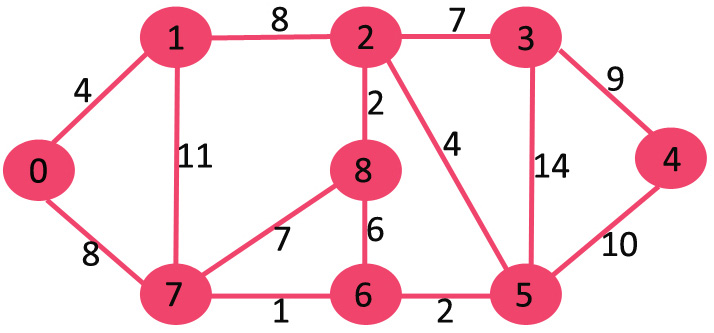